In [6]:
import pickle
import numpy as np
from os import walk
import matplotlib.pyplot as plt

In [37]:
def plot_graph(paths, arch_names, start_seeds, end_seeds, image_name="adding-problem-all-rnns", title="Adding problem for seq. length of 200"):
    training_losses = {}

    line_colors = ["#663300", "#33cc33","#ff0000", "#660066","#66a3ff"]
    shade_colors = [ "#ffcc99","#c2f0c2","#ff9999", "#ffccff", "#b3d1ff"]

    for idx,path1 in enumerate(paths):
        random_seeds = np.arange(start_seeds[idx],end_seeds[idx])
        training_losses[arch_names[idx]] = []
        path=""
        for seed in random_seeds:
            path = path1+"/"+str(seed)
            for (dirpath, dirnames, filenames) in walk(path):
                for file in filenames:
                    if file.endswith("RNN_Train_Losses") or file.endswith("LSTM_Train_Losses"):                    
                        with open(path+"/"+file, 'rb') as handle:                        
                            losses = pickle.load(handle)
                            training_losses[arch_names[idx]].append(losses)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    min_losses = {}

    for idx, arch_name in enumerate(arch_names):
        training_losses_np = np.array(training_losses[arch_name])
#         print(training_losses_np)
        print("\n",arch_name, "\nMin loss for 6 evaluation runs: ", np.amin(training_losses_np, axis=1))
        means = np.mean(training_losses_np, axis=0)
        std_errors = np.std(training_losses_np, axis=0)/np.sqrt(10*800)
        start_std_error = means+std_errors
        end_std_error = means-std_errors
        plt.plot(np.arange(1,801),means,color=line_colors[idx],label=arch_name)
        plt.fill_between(np.arange(1,801),start_std_error,end_std_error, color=shade_colors[idx])

#     ax.legend()
#     plt.xlabel("Iterations")
#     plt.ylabel("Loss")
#     ax.set(ylim=(0, 1))
#     plt.show()

    ax.legend(fontsize='xx-large')
    plt.title(title)
    plt.xlabel("Iterations", fontsize=30)
    plt.ylabel("Loss", fontsize=30)
    ax.set(ylim=(0, 1))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 

    plt.savefig("./images/"+image_name)
    plt.show()


 nnRNN 
Min loss for 6 evaluation runs:  [0.00079752 0.00070299 0.00095489 0.00079508 0.00099656 0.00101921]

 expRNN 
Min loss for 6 evaluation runs:  [0.00186689 0.00140386 0.00114172 0.00162408 0.00143431 0.00129262]

 LSTM 
Min loss for 6 evaluation runs:  [0.00440486 0.00503116 0.0035738  0.00568539 0.00301972 0.00401349]

 RNN 
Min loss for 6 evaluation runs:  [0.00533082 0.00589936 0.00514583 0.00789876 0.00632137 0.0051163 ]


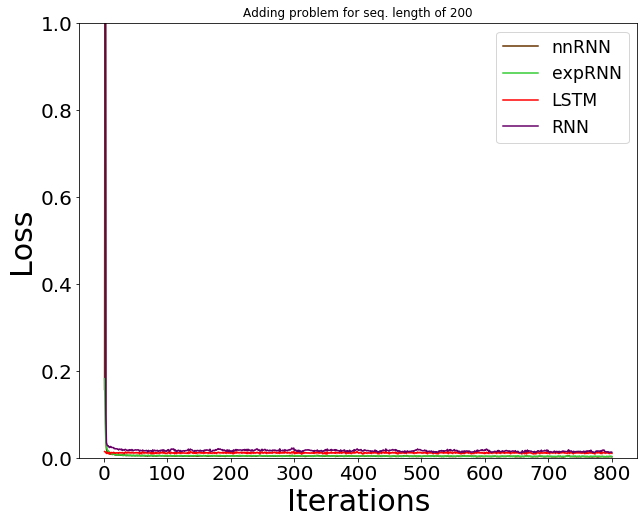

In [41]:
arch_names = ["nnRNN", "expRNN", "LSTM","RNN"]
start_seeds = [840, 840,840,840,840]
end_seeds = [846,846,846,846,846]
paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN', 
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/expRNN',
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM',
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)

In [34]:
arch_names = ["RNN", "nnRNN", "LSTM", "expRNN"]
start_seeds = [840,840,840,840]
end_seeds = [845,845,845,845]
paths = ['./saves/adding-problem-all-rnns-cayley-init/adding-problem/RNN/', './saves/adding-problem-all-rnns-cayley-init/adding-problem/nnRNN/',
         './saves/adding-problem-all-rnns-cayley-init/adding-problem/LSTM/', './saves/adding-problem-all-rnns-cayley-init/adding-problem/expRNN/']
plot_graph(paths, arch_names, start_seeds, end_seeds, "adding-problem-all-rnns", "Adding problem - Equivalent Hidden Size (nhid = 128)")


TypeError: plot_graph() takes from 4 to 5 positional arguments but 6 were given


 nnRNN-cayley-init 
Min loss for 6 evaluation runs:  [0.03483061]

 nnRNN-henaff-init 
Min loss for 6 evaluation runs:  [0.04280273 0.0438568 ]

 expRNN-henaff-init 
Min loss for 6 evaluation runs:  [0.04370317]

 expRNN-cayley-init 
Min loss for 6 evaluation runs:  [0.0230499]


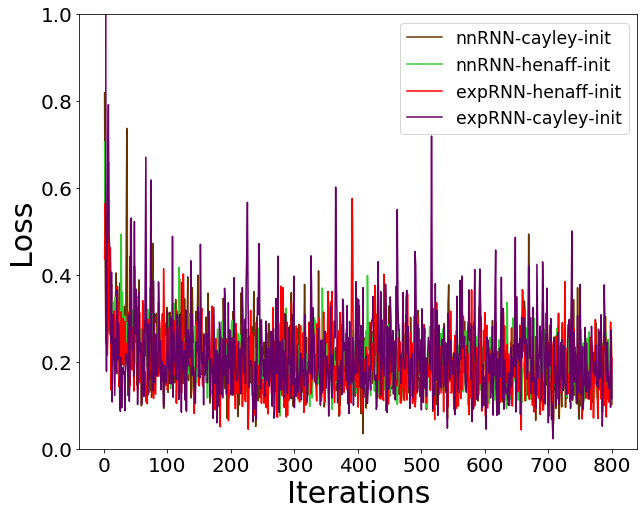

In [33]:
arch_names = ["nnRNN-cayley-init", "nnRNN-henaff-init", "expRNN-henaff-init", "expRNN-cayley-init"]
start_seeds = [3, 1,1,1]
end_seeds = [4,3,2,2]
paths = ['./saves/adding-problem-cayley-init/nnRNN', './saves/adding-problem-henaff-init/nnRNN',
         './saves/adding-problem-henaff-init/expRNN','./saves/adding-problem-cayley-init/expRNN']
plot_graph(paths, arch_names, start_seeds, end_seeds)